<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0038_AluraBB_SeriesTemporaisCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings 
warnings.filterwarnings('ignore') # estou desligando os alertas que "sujam" o código

In [123]:
dados = 'https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/cases-brazil-states.csv'

df_total = pd.read_csv(dados)
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [124]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df['data']) # forçando campo 'data' para o formato de data
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [125]:
df.dtypes

semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

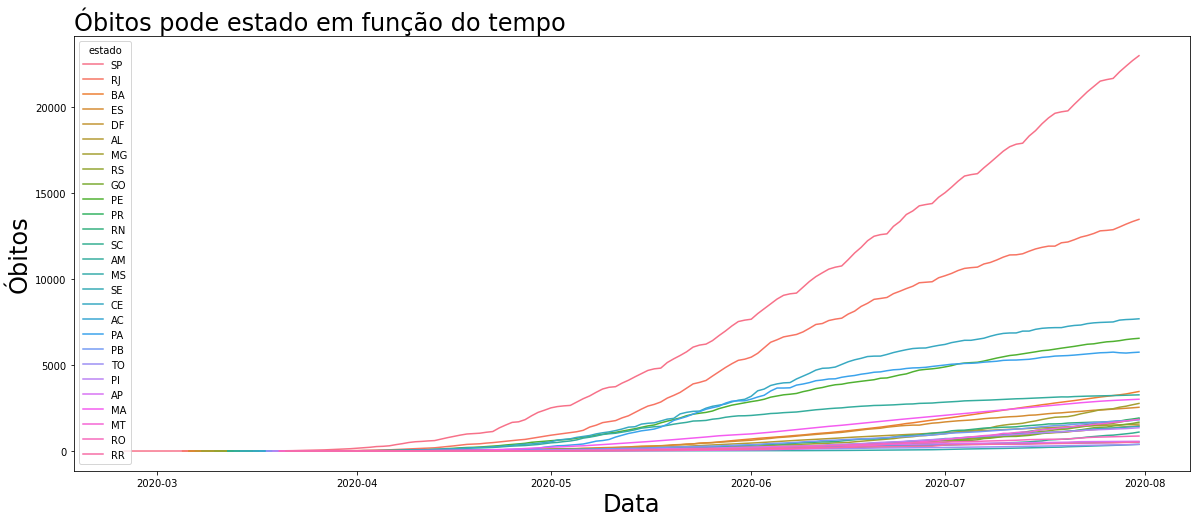

In [126]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos pode estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
plt.show()

O que acontece com a curva? Ela cresce muito rápido e vimos vários epidemiologistas falando do crescimento exponencial. O que significa? Essa curva parece ter esse tipo de comportamento. Que é o quê? É um comportamento que é lento no início. Então podemos ver que nesse primeiro mês, até quase o segundo mês de pandemia tivemos um aumento razoavelmente lento, mas teve um aumento mais lento. Depois, a **angulação dessa curva começa a aumentar** bastante. Essa é uma característica do crescimento exponencial.

# Trabalhando com o estado de SP

In [127]:
df_sp = df[df['estado'] == 'SP' ]
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


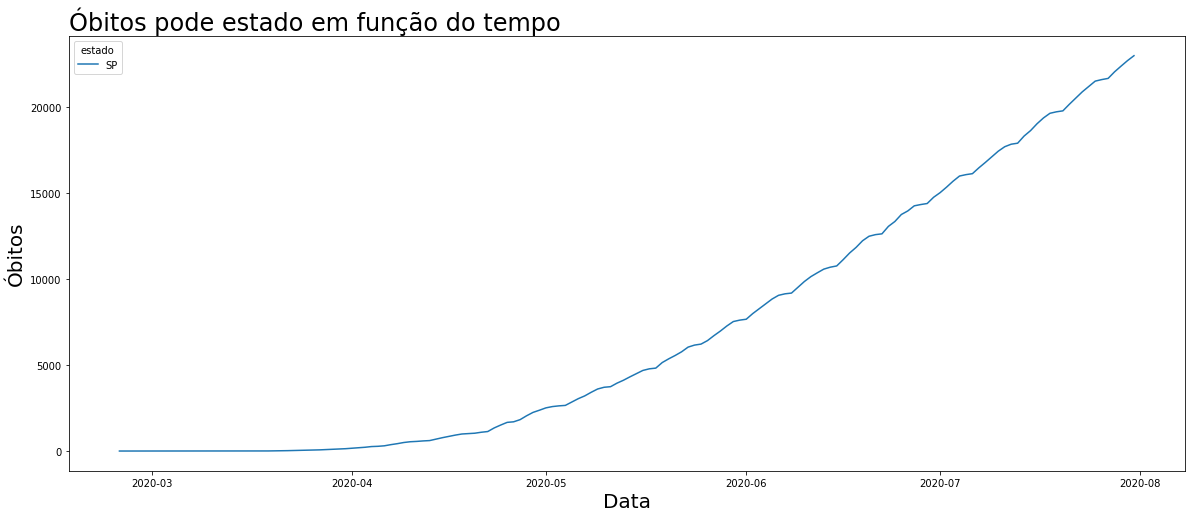

In [128]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df_sp)
fig.set_title('Óbitos pode estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=20)
fig.set_ylabel('Óbitos', fontsize=20)
plt.show()

# Verificando se o crescimento é exponencial

$ \log N = x\Leftrightarrow N = 10^{x} $ <br/>

$ \ln N = x\Leftrightarrow N = e^{x} $


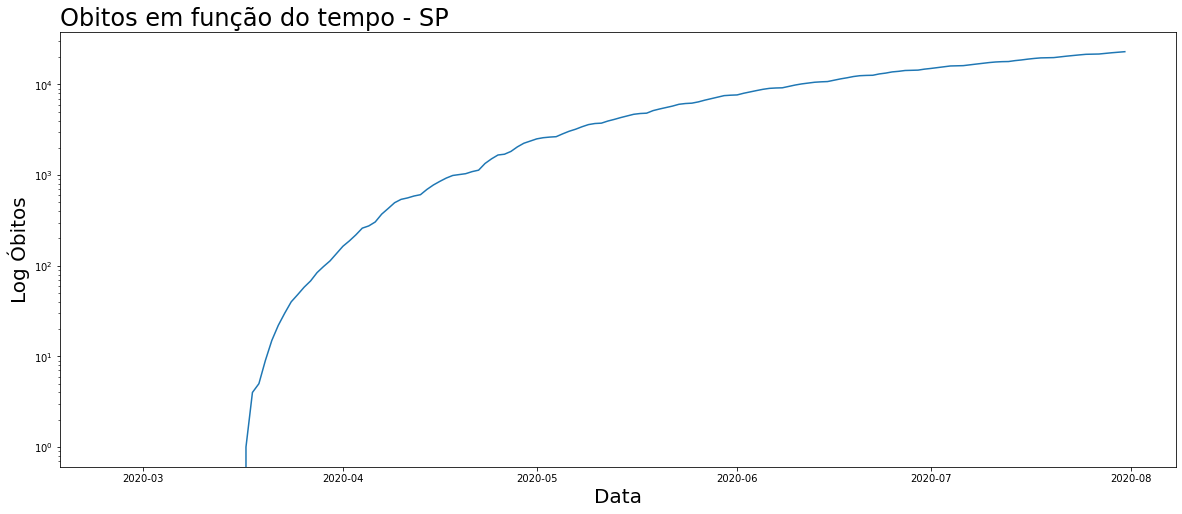

In [129]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', data=df_sp)
fig.set_title('Obitos em função do tempo - SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=20)
fig.set_ylabel('Log Óbitos', fontsize=20)
fig.set_yscale('log')
plt.show()

Se a curva tivesse chegado em um platô significaria que a curva que antes crescia não está mais em crescimento. A taxa de crescimento não está crescendo. Não é o que está acontecendo aqui. O que acontece aqui é que temos uma curva cresce sempre, ela não chega em um platô, ela continua subindo ainda que mais lentamente.<br/>
Isso confirma o **crescimento exponencial**.

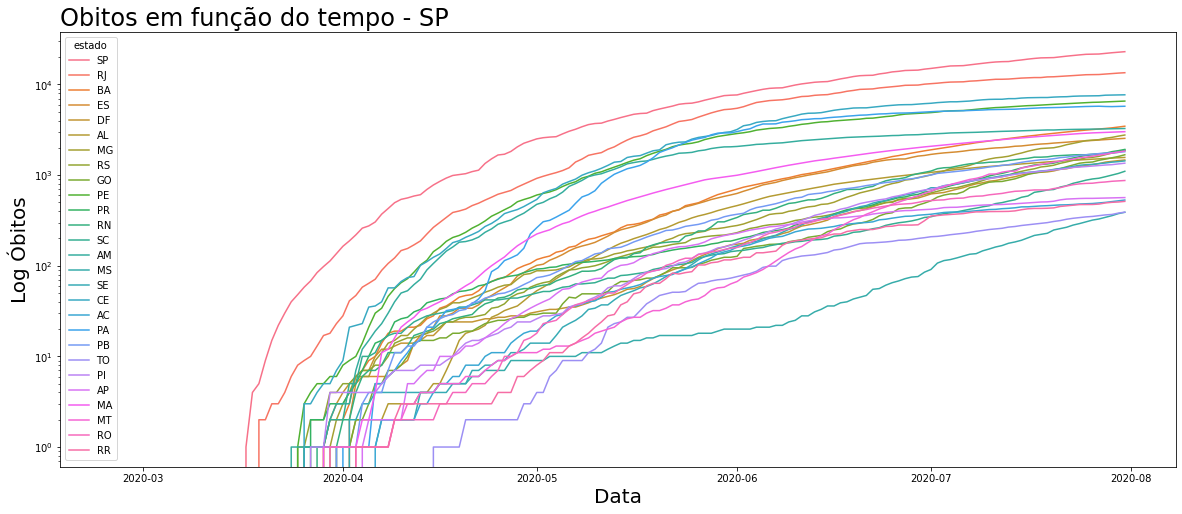

In [130]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Obitos em função do tempo - SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=20)
fig.set_ylabel('Log Óbitos', fontsize=20)
fig.set_yscale('log')
plt.show()

A transformada logarítmica diminui o efeito do viés e da presença de outliers em dados.

Supondo que a distribuição da variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa, medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros. A aplicação da transformação pode reduzir o efeito do viés.

In [131]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


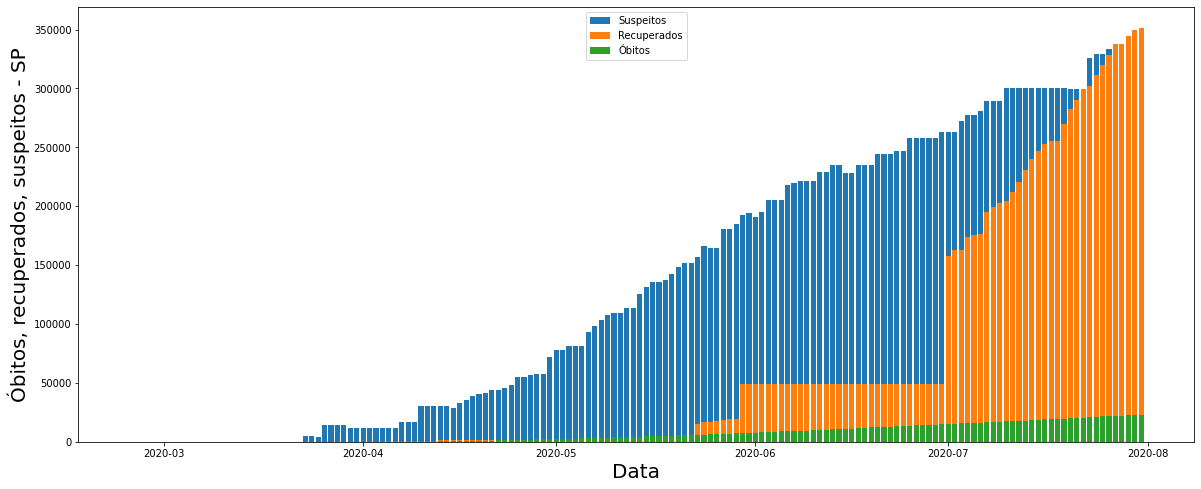

In [132]:
plt.figure(figsize=(20,8))
plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=20)
plt.ylabel('Óbitos, recuperados, suspeitos - SP', fontsize=20, rotation=90)
plt.legend()
plt.show()

As notícias mostram que no dia primeiro de julho foi o primeiro dia que a Secretária Estadual de Saúde do Estado de São Paulo começou a liberar os dados dos recuperados que não estavam internados.

https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml

Então houve uma mudança de metodologia. É complicado isso, quando acontece uma mudança de metodologia ao longo de um problema, não é comum que se faça isso porque os dados acabam perdendo um pouco da sua confiabilidade.

E por outro lado, os dados dos recuperados em junho no estado de São Paulo não foram divulgados. Não sabemos se foram adquiridos e não foram divulgados ou se eles não foram computados.


In [133]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16, rotation=90)

In [134]:
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16, rotation=90)

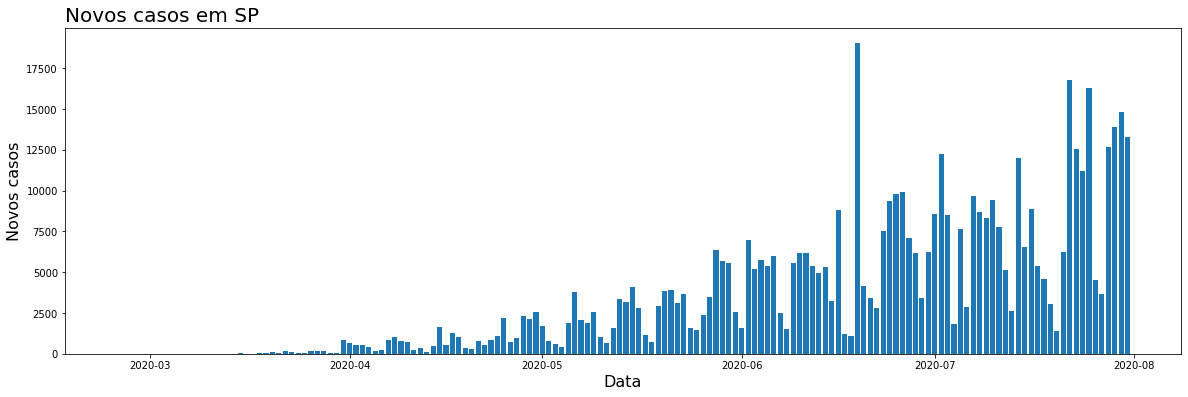

In [135]:
plotar_barra('Novos casos em SP', 'Data', 'Novos casos', 'data', 'novosCasos', df_sp)

Temos uma diferença entre os dias razoavelmente grande. Como podemos computar isso? O que precisamos fazer? Vou criar uma nova coluna que vai se chamar "aceleracaoCasos". Vou calcular da seguinte forma, df_sp[ ‘aceleracaoCasos’] = df_sp[ ‘novosCasos’].diff() que é a variável que estamos trabalhando e usar a função "diff".

Então o que ela vai fazer? Vai calcular a diferença entre, por exemplo, o dia 10 e o dia 9. O dia 11 e o dia 10. E vou ter um vetor com essas informações porque é exatamente isso que é aceleração, é a taxa com a qual as coisas crescem. No caso, por exemplo, a aceleração de um carro é a taxa com a qual a velocidade daquele carro cresce e assim sucessivamente.

In [136]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()

In [137]:
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()

In [138]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


In [139]:
df_sp.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
3847,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0
3875,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0
3903,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0
3931,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,529006,49.45660,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886,913.0,-9.0
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886,-1511.0,-34.0


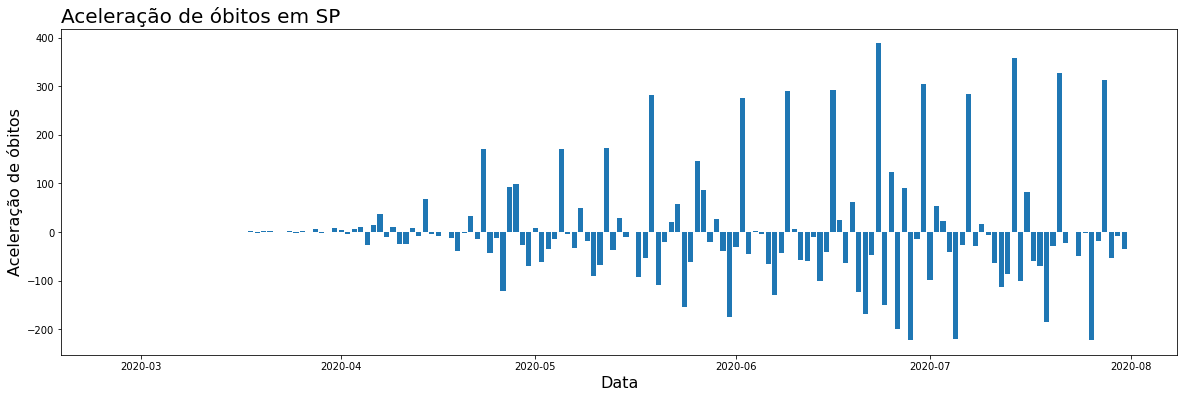

In [140]:
plotar_barra('Aceleração de óbitos em SP', 'Data', 'Aceleração de óbitos', 'data', 'aceleracaoObitos', df_sp)

**Nota minha**: Em outro curso de séries temporais, a diff entre os dias era tratada como incremento e a diff do incremento era tratada como a aceleração.

Verificar esse conceito.

# Média móvel

O que a média móvel vai fazer? Ela vai pegar uma janela de dados. Nesse caso, por exemplo, pode ser uma janela semanal e vai tirar a média dessa semana. E aí você vai ter uma média ao longo da semana de número de casos ou do número de óbitos. Então tem uma suavização. Você diminui esse aspecto da sazonalidade.

In [141]:
df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()

In [142]:
df_sp.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos
3847,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0,269.714286
3875,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0,269.714286
3903,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0,265.285714
3931,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,529006,49.45660,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886,913.0,-9.0,259.428571
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886,-1511.0,-34.0,255.857143


In [143]:
df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()

In [144]:
df_sp.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
3847,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0,269.714286,269.214286
3875,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0,269.714286,266.785714
3903,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0,265.285714,267.785714
3931,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,529006,49.45660,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886,913.0,-9.0,259.428571,262.285714
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886,-1511.0,-34.0,255.857143,258.571429


<BarContainer object of 158 artists>

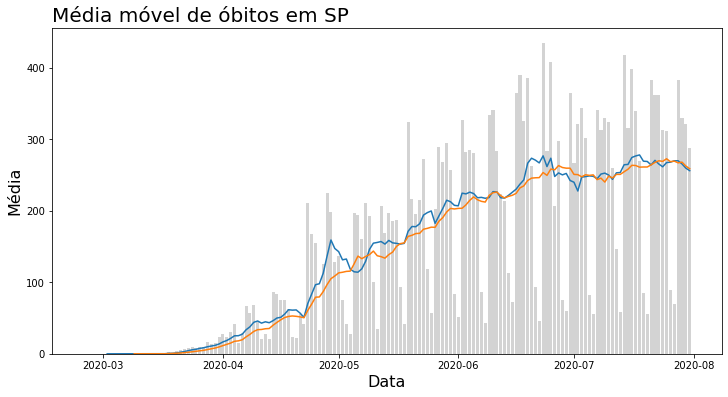

In [145]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média' , 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média' , 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

E quando estamos falando de séries temporais não costumamos falar muito de correlação, mas sim de autocorrelação. Por quê? Porque o tempo é uma variável independente. Ele está lá correndo. Então acaba que temos só uma variável que é a variável, por exemplo, "caso" ou a variável "óbito".

Quando estamos trabalhando com a mesma série temporal nós falamos de autocorrelação. E o que vamos medir é a correlação entre os períodos.

Então se temos, por exemplo, a métrica de tempo sendo o mês, vou estar basicamente dando uma olhada no mês, por exemplo, de agosto e no mês de julho, depois do mês de junho e aí faço esse comparativo. E o nome que damos ao período com essa correlação é **lag**.

# Autocorrelação

In [146]:
from pandas.plotting import autocorrelation_plot

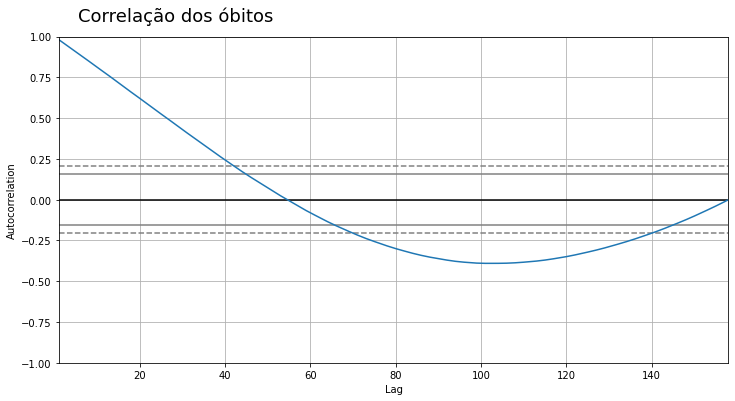

In [147]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.Obitos)
ax = ax

O gráfico que temos tem a correlação dos óbitos. Então temos a autocorrelação em função do lag. E vimos o quê? Que o lag era exatamente os períodos. Nesse caso estamos trabalhando com dia. Então cada lag vai ser cada dia.

E o que percebemos dentro disso? É que, por exemplo, **quando estamos trabalhando com 10 dias, ou até menos, 7 dias que é uma semana, temos uma autocorrelação extremamente alta**. Então ela **está maior do que 0.75**. Ela chega no 0.75 mais ou menos no décimo quinto dia, ou seja, duas semanas. Então em duas semanas o valor de óbitos, por exemplo, do domingo é extremamente auto correlacionado com o valor de óbitos do sábado.

À medida que o tempo vai passando essa autocorrelação vai diminuindo. Normalmente quando chegamos em 0.5 já é uma correlação pequena. Qual que é o problema disso? Isso provavelmente significa que temos uma taxa alta de crescimento. E foi realmente isso no início da pandemia há alguns meses atrás, quase não tínhamos óbitos por Covid e aí tivemos um aumento muito brusco. Por isso temos essa curva.

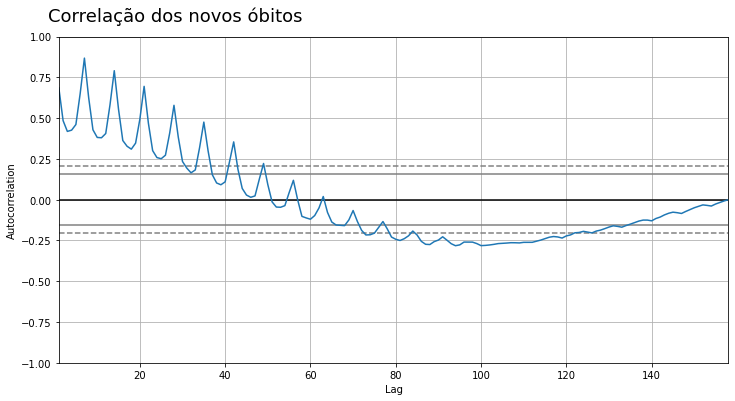

In [148]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp.novosObitos)
ax=ax

Olha que interessante!!! Aquele mesmo comportamento que tínhamos devido a sazonalidade que era um comportamento oscilatório. Por quê? Porque quando chega o fim de semana se trabalha em plantão e tinha um número menor tanto de casos quanto de óbitos. Então tínhamos essa sazonalidade semanal. Ela também está presente aqui.

Como vemos isso? A partir desses picos que também são oscilações. Então o que significa? Por exemplo, iniciamos em um valor alto e na medida que passa aproximadamente uma semana temos um valor muito parecido. Só que se compararmos, por exemplo, que o primeiro dia que estejamos comparando seja domingo e o próximo dia que estamos comparando seja quarta-feira, não vamos ter uma correlação tão alta.

# Autocorrelação da média móvel

Como já vimos anteriormente, percebemos que tem uma oscilação quando trabalhamos com novos óbitos ou com novos casos e teríamos o mesmo resultado, mesmo no "plot" de autocorrelação. Isso acontece por causa da sazonalidade. Como podemos resolver esse problema?

*Plotando a média*. A média móvel que era aquilo que já tínhamos usado para analisar os gráficos de forma mais suave. Vamos tentar fazer exatamente a mesma coisa, só que com o gráfico de autocorrelação. 

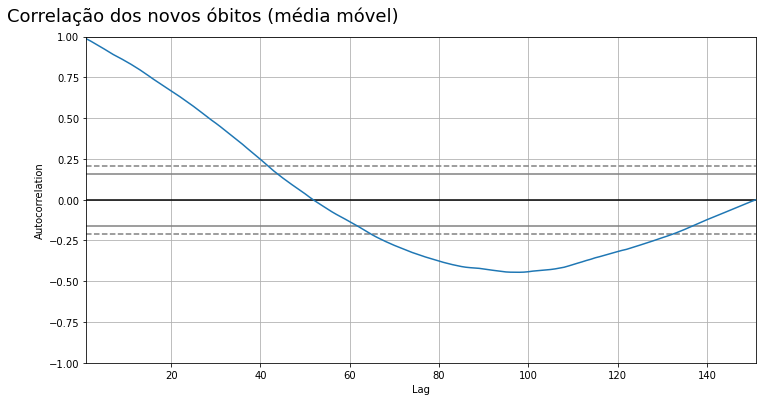

In [149]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])
ax=ax

# Autocorrelação da Aceleração

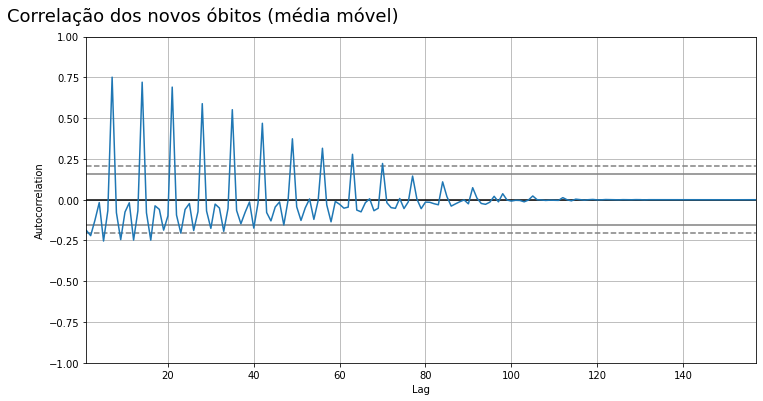

In [150]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax=ax

O que temos? Percebemos que temos um aumento. No início percebemos que a aceleração está de 0.75, então é um valor razoavelmente alto. Porém, ainda sim temos uma oscilação. Inclusive temos valores negativos de autocorrelação.

Por que isso acontece? Porque tínhamos, em alguns pontos, a desaceleração que era causada pela diminuição dos dados no final de semana. Então acabava que tínhamos uma desaceleração que não era real. Isso não significa que a pandemia estava diminuindo ou a taxa de crescimento. Significava apenas que tínhamos obtido menos dados naquele dia. Já descobrimos o porquê disso que era a questão dos plantões.

Da mesma forma temos, na medida que o tempo passa, uma diminuição. Por quê? O que significa? Significa que, se eu analisar o último período que tenho na série temporal com o primeiro, tenho uma autocorrelação muito baixa. Por que tenho uma autocorrelação muito baixa?

Porque tive um aumento muito grande. Tive uma taxa muito alta de aumento, inclusive vimos que era aquela curva que era assim.

# Sazonalidade

Sazonalidade é quando temos uma variável que tem um comportamento muito parecido e repetitivo ao longo de um determinado período de tempo, ou seja, temos uma autocorrelação alta entre períodos.



In [151]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [152]:
dias_traduzidos = {
    'Monday' : 'Segunda',
    'Tuesday' : 'Terça',
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Friday' : 'Sexta',
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}

In [153]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [154]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Sábado


In [155]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()

In [156]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Sábado,6786.0,155.0,-17.0,Sábado
Terça,6794.0,206.0,175.0,Terça


In [157]:
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

In [158]:
agrupados_sp

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sexta,7342.0,177.0,-13.0,Sexta
Sábado,6786.0,155.0,-17.0,Sábado


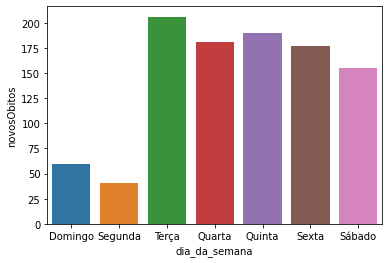

In [159]:
sns.barplot(agrupados_sp['dia_da_semana'], agrupados_sp['novosObitos'])

In [160]:
date.today()

datetime.date(2022, 2, 5)

In [161]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.weekday
    df['mês'] = df['mes'].dt.month
    df['diames'] = df['mes'].dt.day

    X = df[['diasemana', 'mês', 'diames']]

    if label:
        y = df[label]
        return X, y
    return X

In [162]:
X, y = criar_features(df_sp, label='Obitos')

In [163]:
df_final = pd.concat([X,y], axis=1)
df_final.tail(10)

,diasemana,mês,diames,Obitos
3707,2,7,22,20532
3735,3,7,23,20894
3763,4,7,24,21206
3791,5,7,25,21517
3819,6,7,26,21606
3847,0,7,27,21676
3875,1,7,28,22059
3903,2,7,29,22389
3931,3,7,30,22710
3959,4,7,31,22997


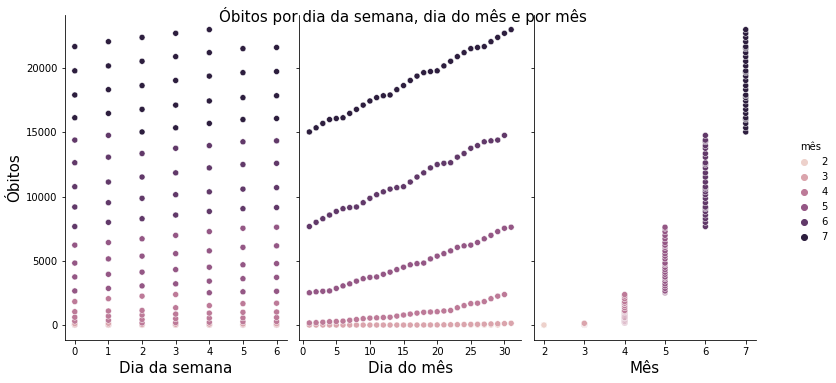

In [164]:
g = sns.pairplot(df_final.dropna(), hue='mês',
                 x_vars = ['diasemana', 'diames', 'mês'],
                 y_vars = 'Obitos')

g.fig.set_size_inches(12, 6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês e por mês', fontsize=15)
plt.show()

[03:55] E olha só o que acontece. Quando analisamos por dia da semana, então do dia 0 ao dia 6, observamos que sempre há um aumento de óbitos no meio. Então, valores maiores. E esse espaçamento também começa a aumentar na medida que os meses passam. Então aqui no início do gráfico de "Dia do mês" está bem apertado. Por quê? Porque temos quatro semanas normalmente no mês ou às vezes tem cinco dependendo de como o mês se organiza. Antes não tínhamos uma variação tão grande entre as semanas do mês.

[04:34] E na medida que os meses foram passando, percebemos que nessa primeira semana do mês 7, temos o quê? Uma média de 16 mil óbitos. E aí quando chegamos no final já ultrapassamos 20 mil óbitos. Então são dados acumulados e obviamente temos um aumento expressivo.

[05:00] A mesma coisa acontece com o dia do mês. Inicialmente nos primeiros meses não tínhamos uma diferença muito grande em relação a quantidade de óbitos à medida em que o mês ia passando. Agora fomos aumentando a inclinação da curva. O que significa? Que temos uma aceleração, temos mais óbitos por dia acontecendo. Isso é problemático.

[05:24] Porque diz que a pandemia não está controlada. E no caso do mês, temos a mesma coisa. Em relação aos óbitos, nos primeiros meses, o valor que se inicia o mês era muito parecido com o valor que se terminava o mês. Por outro lado, no mês 7 já temos esse afastamento. Por quê? Porque ao longo do mês temos um aumento desse acumulado de óbitos muito grande. Por quê?

[05:56] Porque morrem mais pessoas por dia. E aí vamos só somando esses valores. Isso mostra que de fato, apesar de termos aquela questão da sazonalidade, quando olhamos por semana podemos achar, "Será que está diminuindo? Será que aquela curva que parecia tão exponencial antes agora já atingiu um platô?". Olha, esses dados dizem para nós que não e que ainda é uma situação preocupante e que precisamos ter cuidado.

In [165]:
def criar_features2(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

In [166]:
X, y = criar_features2(df_sp, label='Obitos')
df_final2 = pd.concat([X,y], axis=1)
df_final2.tail(10)

,diasemana,mês,diamês,semana,Obitos
3707,2,7,22,30,20532
3735,3,7,23,30,20894
3763,4,7,24,30,21206
3791,5,7,25,30,21517
3819,6,7,26,30,21606
3847,0,7,27,31,21676
3875,1,7,28,31,22059
3903,2,7,29,31,22389
3931,3,7,30,31,22710
3959,4,7,31,31,22997


Text(0.5, 0.98, 'Óbitos por semana')

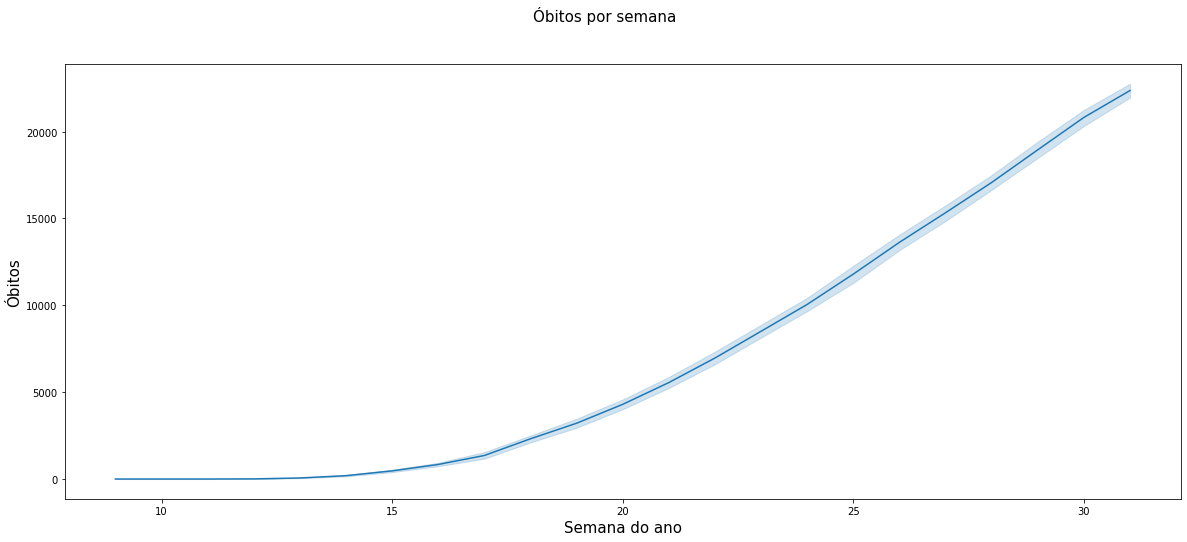

In [167]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='Obitos',data=df_final2)

g.axes.set_xlabel('Semana do ano',fontsize=15)
g.axes.set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por semana',fontsize=15)